In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, train_test_split
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [24]:
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.6f}'.format})

In [16]:
df = pd.read_csv('datasets/boston.csv')

In [17]:
df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [18]:
df.shape

(506, 13)

In [20]:
features = df.drop(columns=['Median Home Value'])
target = df['Median Home Value']

In [21]:
model = PCA(n_components=features.shape[1])
feature_pca = model.fit_transform(features)

In [22]:
feature_pca[:5]

array([[-1.13002193e+02,  2.86786936e+00,  5.22622365e+00,
        -2.27621407e+00, -6.35976173e+00, -1.02924797e+00,
        -5.45841708e+00, -1.96570940e+00, -3.29179627e-01,
        -3.76815682e-01, -7.28402345e-02,  3.39055317e-02],
       [-1.64339238e+02,  3.07913767e+01,  1.26119071e+00,
         1.57292652e-01, -3.29028345e+00, -6.28296910e-01,
        -9.22169296e-01,  4.66716319e-01,  1.29985149e+00,
        -4.79206884e-02, -9.49527769e-02, -3.31635289e-02],
       [-1.65994946e+02,  1.68471287e+01, -1.02846512e+01,
        -2.42313525e-01, -5.90656703e+00,  1.69504797e+00,
        -4.63066931e-01,  3.88630994e-01,  9.10989267e-01,
         4.75787566e-01, -1.07794722e-01, -4.31262753e-03],
       [-1.87298841e+02,  6.70023829e+00, -1.96244425e+01,
         1.45097317e+00, -6.95801631e+00, -1.99782223e+00,
        -8.06526326e-01,  1.03350318e+00,  9.64874721e-01,
         2.87399660e-01, -5.43500966e-02,  4.43578253e-02],
       [-1.86517530e+02,  1.32767626e+01, -1.4172868

In [25]:
model.explained_variance_ratio_

array([0.960041, 0.027388, 0.008893, 0.001726, 0.000936, 0.000536,
       0.000320, 0.000110, 0.000039, 0.000009, 0.000002, 0.000000])

In [26]:
model.explained_variance_ratio_.sum()

np.float64(1.0)

In [27]:
np.sum(model.explained_variance_ratio_)

np.float64(1.0)

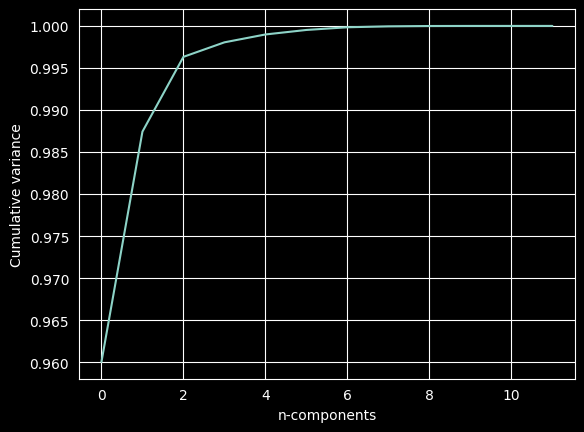

In [32]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(model.explained_variance_ratio_))
# ax.set_ylim(0, 1.1)
ax.set_xlabel('n-components')
ax.set_ylabel('Cumulative variance')
plt.show()

In [54]:
def build_model(regression_fn, target, features, n_components, constant):
    X = features
    y = target

    pca = PCA(n_components=n_components)

    X_new = pca.fit_transform(X)
    if constant is True:
        X_new = add_constant(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    model = regression_fn(X_train, y_train)

    y_pred = model.predict(X_test)

    return {
        'x_initial': X,
        'x_transform': X_new,
        'x_train': X_train,
        'x_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': model
    }

In [55]:
def ols_reg(X_train, y_train):
    ols = OLS(y_train, X_train)

    model = ols.fit()
    return model

In [56]:
def linear_reg(X_train, y_train):
    linear = LinearRegression().fit(X_train, y_train)

    return linear

In [57]:
ols_result = build_model(ols_reg, target, features, 7, True)

In [58]:
ols_result['x_transform'].shape

(506, 8)

In [59]:
ols_result['x_initial'].shape

(506, 12)

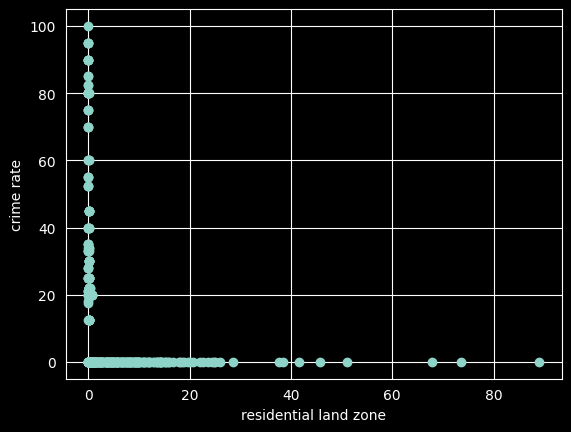

In [60]:
fig, ax = plt.subplots()

ax.scatter(ols_result['x_initial']['crime rate'], ols_result['x_initial']['residential land zone'])
ax.set_xlabel('residential land zone')
ax.set_ylabel('crime rate')

plt.show()

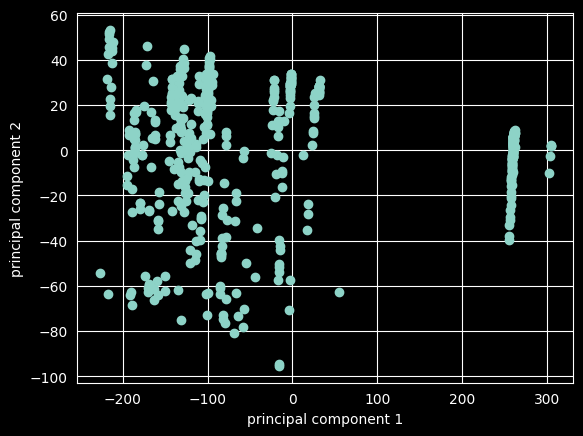

In [61]:
fig, ax = plt.subplots()
ax.scatter(ols_result['x_transform'][:, 1], ols_result['x_transform'][:, 2])

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [62]:
ols_result['x_transform'][:5,1:5]

array([[-113.002193, 2.867869, 5.226224, -2.276214],
       [-164.339238, 30.791377, 1.261191, 0.157293],
       [-165.994946, 16.847129, -10.284651, -0.242314],
       [-187.298841, 6.700238, -19.624442, 1.450973],
       [-186.517530, 13.276763, -14.172868, 1.661640]])

In [63]:
reg_result = build_model(linear_reg, target, features, 7, False)

In [64]:
reg_result['model'].score(reg_result['x_train'], reg_result['y_train'])

0.6160513505162946

In [65]:
metrics.r2_score(reg_result['y_test'], reg_result['y_pred'] )

0.5189183731130336